In [49]:
import seaborn as sns
import pandas as pd
import numpy as np

In [55]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
# We are doing binary classification. So,we have to drop a category(setosa)
df = df[df['species']!='setosa']
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


<Axes: >

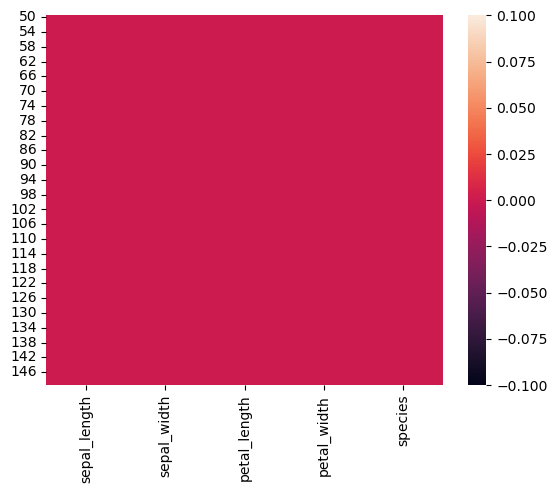

In [58]:
sns.heatmap(df.isnull())


In [59]:
df['species'] = df['species'].map({'versicolor':0, 'virginica':1})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [60]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [61]:
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [77]:
## parameter tuning
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['11','12','elasticnet','none'], 'C':[1,2,3,4,6,10,20], 'max_iter':[100,200,300]}

In [78]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [79]:
classifier_regressor.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 6, 10, 20],
                         'max_iter': [100, 200, 300],
                         'penalty': ['11', '12', 'elasticnet', 'none']},
             scoring='accuracy')

In [82]:
# which parameter is selected
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'none'}


In [83]:
print(classifier_regressor.best_score_)

1.0


In [84]:
y_pred = classifier_regressor.predict(x_test)

In [85]:
##Accracy
from sklearn.metrics import accuracy_score, classification_report

In [87]:
score = accuracy_score(y_pred, y_test)
print(score)

0.92


In [88]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
